In [107]:
#imports

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score




In [108]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

#Sci-Kit Learn Format
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [109]:
pip install numpy==1.16.1

Note: you may need to restart the kernel to use updated packages.


In [113]:
#Create the dataset with the default of credit card clients
#del rawData
rawData = pd.read_csv(r'C:\Base\U\Program 5 - task 3\default of credit card clients.csv')

In [114]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [115]:
#Remove outliers
rawData = rawData.drop(rawData[rawData.LIMIT_BAL >= 1000000].index)

#rawData.drop(rawData.columns[0], axis='columns', inplace=True)

In [116]:
#Create new columns for age range
#bins = [20, 30, 40, 50, 60, 70, 80]
#labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
#rawData['AGE'] = pd.cut(rawData.AGE, bins, labels = labels,include_lowest = True)

In [117]:
#Setting variables to categorical
rawData['SEX'] = rawData['SEX'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')
#rawData['DPNM'] = rawData['DPNM'].astype('category')
#rawData['AGE'] = rawData['AGE'].astype('category')


In [118]:
#rawData['DPNM'].dtype
rawData['DPNM'] = rawData['DPNM'].astype('bool')

In [119]:
# delete age
#rawData.drop(rawData.columns[7], axis='columns', inplace=True)

In [120]:
#features
features = rawData.iloc[:,0:24] #Cambiar aqui para seleccionar variables a usar
print('Summary of feature sample')
print(features.head())



Summary of feature sample
   ID  LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  ...  \
0   1      20000   2         2        1   24      2      2     -1     -1  ...   
1   2     120000   2         2        2   26     -1      2      0      0  ...   
2   3      90000   2         2        2   34      0      0      0      0  ...   
3   4      50000   2         2        1   37      0      0      0      0  ...   
4   5      50000   1         2        1   57     -1      0     -1      0  ...   

   BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0        689          0          0          0         0       689         0   
1       2682       3272       3455       3261         0      1000      1000   
2      13559      14331      14948      15549      1518      1500      1000   
3      49291      28314      28959      29547      2000      2019      1200   
4      35835      20940      19146      19131      2000     36681     10000   

   PAY_AMT4 

In [121]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [122]:
#dependent variable
depVar = rawData['DPNM']

In [123]:
#Dependent Variable Training Set (y Training)
#y_train = depVar[: 1000]
#y_train_count = len(y_train.index)
#print('The number of observations in the Y training set are:',str(y_train_count))
#y_train.head()

In [124]:
#Testing Set (X Testing)
#X_test = features[-100:]
#X_test_count = len(X_test.index)
#print('The number of observations in the feature testing set is:',str(X_test_count))
#print(X_test.head())

In [125]:
#Ground Truth (y_test) 
#y_test = depVar[-100:]
#y_test_count = len(y_test.index)
#print('The number of observations in the Y training set are:',str(y_test_count))
#y_test.head()

In [126]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, train_size=0.6, random_state=0)
print(X_train.shape) 
print(X_test.shape)

(17999, 24)
(12000, 24)


In [127]:
# Building Models and choosing the  right model
#Models
modelSVR = SVC(kernel='sigmoid',gamma = 'auto', random_state=0)
modelRF = RandomForestClassifier(n_estimators=250, random_state=0, max_features=2)
modelLR = LogisticRegression(solver='liblinear', random_state=0)



In [128]:
modelSVR.fit(X_train,y_train)
print("===== Cross Validation Score ======")
print(cross_val_score(modelSVR, X_train, y_train))
print("===== Score ======")
print(modelSVR.score(X_train,y_train))

===== Cross Validation Score ======


C:\Users\Beto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.7695     0.77716667 0.77746291]
===== Score ======
0.7772098449913885


In [129]:
predictionsSVR = modelSVR.predict(X_test)

In [130]:
print("===== Accuracy ======")
print(accuracy_score(y_test, predictionsSVR))
cm = confusion_matrix(y_test, predictionsSVR) 
print ("===== Confusion Matrix =====\n", cm)

===== Accuracy ======
0.7811666666666667
===== Confusion Matrix =====
 [[9374    0]
 [2626    0]]


In [131]:
objects = ('Yes', 'No')
y_pos = np.arange(len(objects))

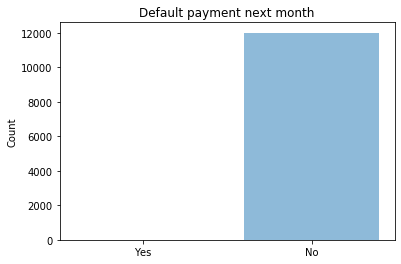

In [132]:
values = [(predictionsSVR ==1).sum(), (predictionsSVR ==0).sum()]
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Default payment next month')
plt.show()

In [133]:
#RF

modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train)) 
print(modelRF.score(X_train,y_train))
predictionsRF = modelRF.predict(X_test)

C:\Users\Beto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81333333 0.817      0.81346891]
1.0


In [134]:
predictionsRF = modelRF.predict(X_test)

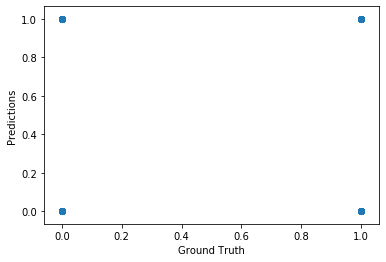

In [135]:
plt.scatter(y_test, predictionsRF, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();


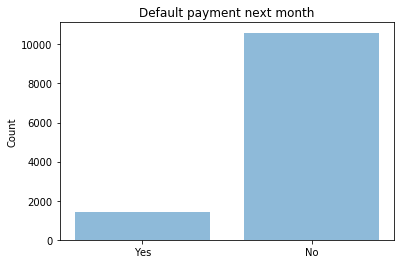

In [136]:
valuesRF = [(predictionsRF ==1).sum(), (predictionsRF ==0).sum()]
plt.bar(y_pos, valuesRF, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Default payment next month')
plt.show()

In [137]:
#LR

modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train))
print(modelLR.score(X_train,y_train))
predictionsLR = modelLR.predict(X_test)


C:\Users\Beto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77733333 0.777      0.77746291]
0.7772654036335352


In [138]:
print("===== Accuracy ======")
print(accuracy_score(y_test, predictionsLR))
cmLR = confusion_matrix(y_test, predictionsLR) 
print ("===== Confusion Matrix =====\n", cmLR)

===== Accuracy ======
0.7811666666666667
===== Confusion Matrix =====
 [[9374    0]
 [2626    0]]


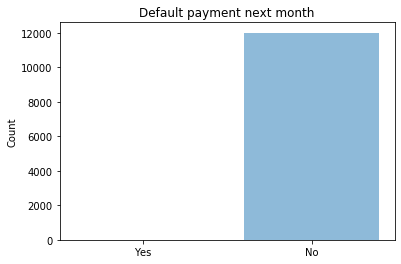

In [139]:
valuesLR = [(predictionsLR ==1).sum(), (predictionsLR ==0).sum()]
plt.bar(y_pos, valuesLR, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Default payment next month')
plt.show()

In [140]:
rawDataResult = rawData 

In [141]:
X_testResults = X_test

In [142]:
X_testResults['predictionsLR'] = predictionsLR

C:\Users\Beto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
X_testResults['predictionsRF'] = predictionsRF

C:\Users\Beto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
X_testResults['predictionsSVC'] = predictionsSVR

C:\Users\Beto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
 X_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,predictionsLR,predictionsRF,predictionsSVC
18711,18712,70000,2,1,2,26,0,0,0,0,...,44077,2500,2300,2300,2000,1900,3000,False,False,False
23293,23294,100000,2,2,2,31,-2,-2,-2,-2,...,900,1872,2517,3339,2765,900,2575,False,False,False
28849,28850,180000,2,2,2,38,0,0,0,0,...,10906,2000,2000,2000,1000,2000,2000,False,False,False
18408,18409,70000,2,2,2,23,0,0,0,0,...,16497,1619,4000,1200,592,330,177,False,False,False
5148,5149,110000,1,3,2,33,1,2,0,0,...,0,0,1000,0,0,0,0,False,False,False


In [146]:
X_testResults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,predictionsLR,predictionsRF,predictionsSVC
18711,18712,70000,2,1,2,26,0,0,0,0,...,44077,2500,2300,2300,2000,1900,3000,False,False,False
23293,23294,100000,2,2,2,31,-2,-2,-2,-2,...,900,1872,2517,3339,2765,900,2575,False,False,False
28849,28850,180000,2,2,2,38,0,0,0,0,...,10906,2000,2000,2000,1000,2000,2000,False,False,False
18408,18409,70000,2,2,2,23,0,0,0,0,...,16497,1619,4000,1200,592,330,177,False,False,False
5148,5149,110000,1,3,2,33,1,2,0,0,...,0,0,1000,0,0,0,0,False,False,False


In [147]:
# Print the dataset in the .csv
X_testResults.to_csv(r'C:\Base\U\Program 5 - task 3\y X_testResults.csv')